# Experimental Data Analysis
This is the data from the first trial through the Google Forms. We have 2 hypotheses, gradable and non-gradable, with a control and borderline group for 4 different versions

In [43]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
FORMS_DIR = "data"
dfs = []
for file in os.listdir(FORMS_DIR):
    print(file[:-17])
    df = pd.read_excel(FORMS_DIR+"/"+file)
    df = df.drop("Enter your Kerberos to be entered into the Amazon gift card drawing!",axis=1)
    df["pelty"]=df["Answer on a scale of 1-7, where 1 means you're certain it's not pelty and 7 means you're certain it's pelty. 4 means unsure."]
    df = df.drop("Answer on a scale of 1-7, where 1 means you're certain it's not pelty and 7 means you're certain it's pelty. 4 means unsure.",axis=1)
    df["Timestamp"]=pd.to_datetime(df["Timestamp"])
    dfs.append((file[:-17],df))
dfs=sorted(dfs)
    

Version 2 (Control)
Version 3 (Borderline)
Version 4 (Control)
Version 1 (Borderline)


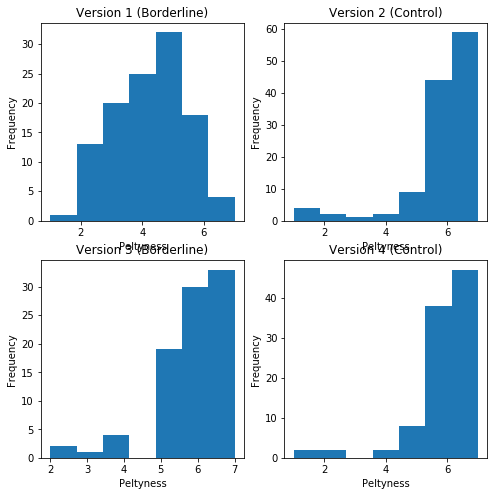

In [68]:
fig,axs = plt.subplots(2,2,figsize=(8,8))
tups = [(0,0),(0,1),(1,0),(1,1)]
means = []
stds = []
for i in range(len(dfs)):
    name,df = dfs[i]
    x,y = tups[i]
    axs[x,y].set_title(name)
    axs[x,y].set_xlabel("Peltyness")
    axs[x,y].set_ylabel("Frequency")
    axs[x,y].hist(df["pelty"],bins=7)
    means.append(df["pelty"].describe()['mean'])
    stds.append(df["pelty"].describe()["std"])
plt.show()

In [71]:
(4.274336283185841-1)/6

0.5457227138643068

In [72]:
(6.12396694214876-1)/6

0.8539944903581267

In [73]:
probs = [(m-1)/6 for m in means]

In [74]:
probs

[0.5457227138643068, 0.8539944903581267, 0.8239700374531834, 0.861952861952862]

In [82]:
yerr = np.array([[0,0],[1,1],[2,2],[3,3]]).T
yerr.shape

(2, 4)

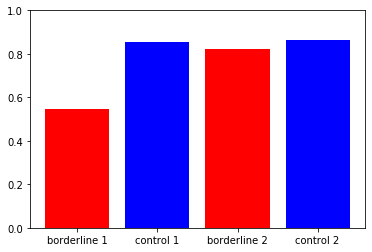

In [79]:
plt.bar(['borderline 1','control 1','borderline 2','control 2'],probs,color=['r','b','r','b'])
plt.ylim(0,1)
# add error bars
# statisical significant
# 1 star = .05, 2 star = .01, 3 star = .001
plt.show()

In [65]:
# plot model outputs